A weather meteogram is a time-series graphical representation that displays detailed weather information for a specific location over a continuous period. This compact chart captures various meteorological variables such as air and soil temperature, wind speed and direction, precipitation, cloud cover, and atmospheric pressure. Each variable is typically plotted against time on the horizontal axis, allowing for a clear visual analysis of weather trends and patterns.

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Read data and display the first 5 rows
filename = '../datasets/kings_creek_2022_2023_daily.csv'
df = pd.read_csv(filename, parse_dates=['datetime'])
df.head()


,datetime,pressure,tmin,tmax,tavg,rmin,rmax,prcp,srad,wspd,wdir,vpd,vwc_5cm,vwc_20cm,vwc_40cm,soiltemp_5cm,soiltemp_20cm,soiltemp_40cm,battv
0,2022-01-01,96.837917,-14.8,-4.4,-9.60,78.475475,98.012496,0.0,2.09808,5.483333,0.968820,0.027500,0.256750,0.307000,0.359000,2.995833,5.391667,7.425000,8714.833333
1,2022-01-02,97.994583,-20.4,-7.2,-13.80,50.543218,84.935503,0.0,9.75636,2.216250,2.023276,0.072500,0.256000,0.307000,0.358292,2.562500,4.250000,6.691667,8890.041667
2,2022-01-03,97.843750,-9.4,8.8,-0.30,40.622240,82.662479,0.0,9.68076,2.749167,5.667358,0.261667,0.255167,0.307000,0.358000,2.454167,3.916667,6.208333,8924.833333
3,2022-01-04,96.418750,0.1,8.6,4.35,48.326316,69.401604,0.0,8.37900,5.805833,2.627163,0.363333,0.288958,0.319417,0.357125,2.495833,3.754167,5.841667,8838.291667
4,2022-01-05,97.462500,-11.1,-2.2,-6.65,50.341455,76.828233,0.0,5.71716,4.206667,1.250533,0.126250,0.312833,0.337000,0.357333,1.687500,3.429167,5.566667,8848.083333


In [9]:
# Select data for January
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-01-01')
idx = (df['datetime'] >= start_date) & (df['datetime'] < end_date)
df = df[idx].copy().reset_index(drop=True)
df.head()


,datetime,pressure,tmin,tmax,tavg,rmin,rmax,prcp,srad,wspd,wdir,vpd,vwc_5cm,vwc_20cm,vwc_40cm,soiltemp_5cm,soiltemp_20cm,soiltemp_40cm,battv
0,2022-01-01,96.837917,-14.8,-4.4,-9.60,78.475475,98.012496,0.0,2.09808,5.483333,0.968820,0.027500,0.256750,0.307000,0.359000,2.995833,5.391667,7.425000,8714.833333
1,2022-01-02,97.994583,-20.4,-7.2,-13.80,50.543218,84.935503,0.0,9.75636,2.216250,2.023276,0.072500,0.256000,0.307000,0.358292,2.562500,4.250000,6.691667,8890.041667
2,2022-01-03,97.843750,-9.4,8.8,-0.30,40.622240,82.662479,0.0,9.68076,2.749167,5.667358,0.261667,0.255167,0.307000,0.358000,2.454167,3.916667,6.208333,8924.833333
3,2022-01-04,96.418750,0.1,8.6,4.35,48.326316,69.401604,0.0,8.37900,5.805833,2.627163,0.363333,0.288958,0.319417,0.357125,2.495833,3.754167,5.841667,8838.291667
4,2022-01-05,97.462500,-11.1,-2.2,-6.65,50.341455,76.828233,0.0,5.71716,4.206667,1.250533,0.126250,0.312833,0.337000,0.357333,1.687500,3.429167,5.566667,8848.083333


In [11]:
# Display number of missing values for each column. 
df.isna().sum()


datetime          0
pressure          0
tmin              0
tmax              0
tavg              0
rmin              0
rmax              0
prcp              0
srad              0
wspd              1
wdir             28
vpd               2
vwc_5cm           0
vwc_20cm          0
vwc_40cm          0
soiltemp_5cm      0
soiltemp_20cm     0
soiltemp_40cm     0
battv             0
dtype: int64

In [12]:
# Replace missing values
df['wspd'] = df['wspd'].interpolate(method='linear')
df['vpd'] = df['vpd'].interpolate(method='linear')


In [13]:
# Display the new number of missing values for each column. 
df.isna().sum()


datetime          0
pressure          0
tmin              0
tmax              0
tavg              0
rmin              0
rmax              0
prcp              0
srad              0
wspd              0
wdir             28
vpd               0
vwc_5cm           0
vwc_20cm          0
vwc_40cm          0
soiltemp_5cm      0
soiltemp_20cm     0
soiltemp_40cm     0
battv             0
dtype: int64

## Estimate some useful metrics

To characterize what happened during the entire year, let's compute the annual rainfall, maximum wind speed, and maximum and minimum air temperature.


In [14]:
# Find and print total precipitation
P_total = df['prcp'].sum().round(2)
print(f'Total precipitation in 2023 was {P_total} mm')

Total precipitation in 2023 was 523.28 mm


In [16]:
# Find the total number of days with measurable precipitation
P_hours = (df['prcp'] > 0).sum()
print(f'There were {P_hours} days with precipitation')


There were 108 days with precipitation


In [17]:
# Find median air temperature. Print value.
Tmedian = df['tavg'].median()
print(f'Median air temperature was {Tmedian} Celsius')


Median air temperature was 13.65 Celsius


In [23]:
# Find value and time of minimum air temperature. Print value and timestamp.
fmt = '%A, %B %d, %Y'
Tmin_idx = df['tmin'].argmin()
Tmin_value = df.loc[Tmin_idx, 'tmin']
Tmin_timestamp = df.loc[Tmin_idx, 'datetime']
print(f'The lowest air temperature was {Tmin_value} on {Tmin_timestamp:{fmt}}')


The lowest air temperature was -22.4 on Thursday, December 22, 2022


In [24]:
# Find value and time of maximum air temperature. Print value and timestamp.
Tmax_idx = df['tmax'].argmax()
Tmax_value = df.loc[Tmax_idx, 'tmax']
Tmax_timestamp = df.loc[Tmax_idx, 'datetime']
print(f'The highest air temperature was {Tmax_value} on {Tmax_timestamp:{fmt}}')

The highest air temperature was 37.4 on Saturday, July 23, 2022


In [27]:
# Find max wind gust and time of occurrence. Print value and timestamp.
Wmax_idx = df['wspd'].argmax()
Wmax_value = df.loc[Wmax_idx, 'wspd']
Wmax_timestamp = df.loc[Wmax_idx, 'datetime']
print(f'The highest wind speed was {Wmax_value:.2f} m/s on {Wmax_timestamp:{fmt}}')

The highest wind speed was 8.15 m/s on Tuesday, April 12, 2022


## Meteogram


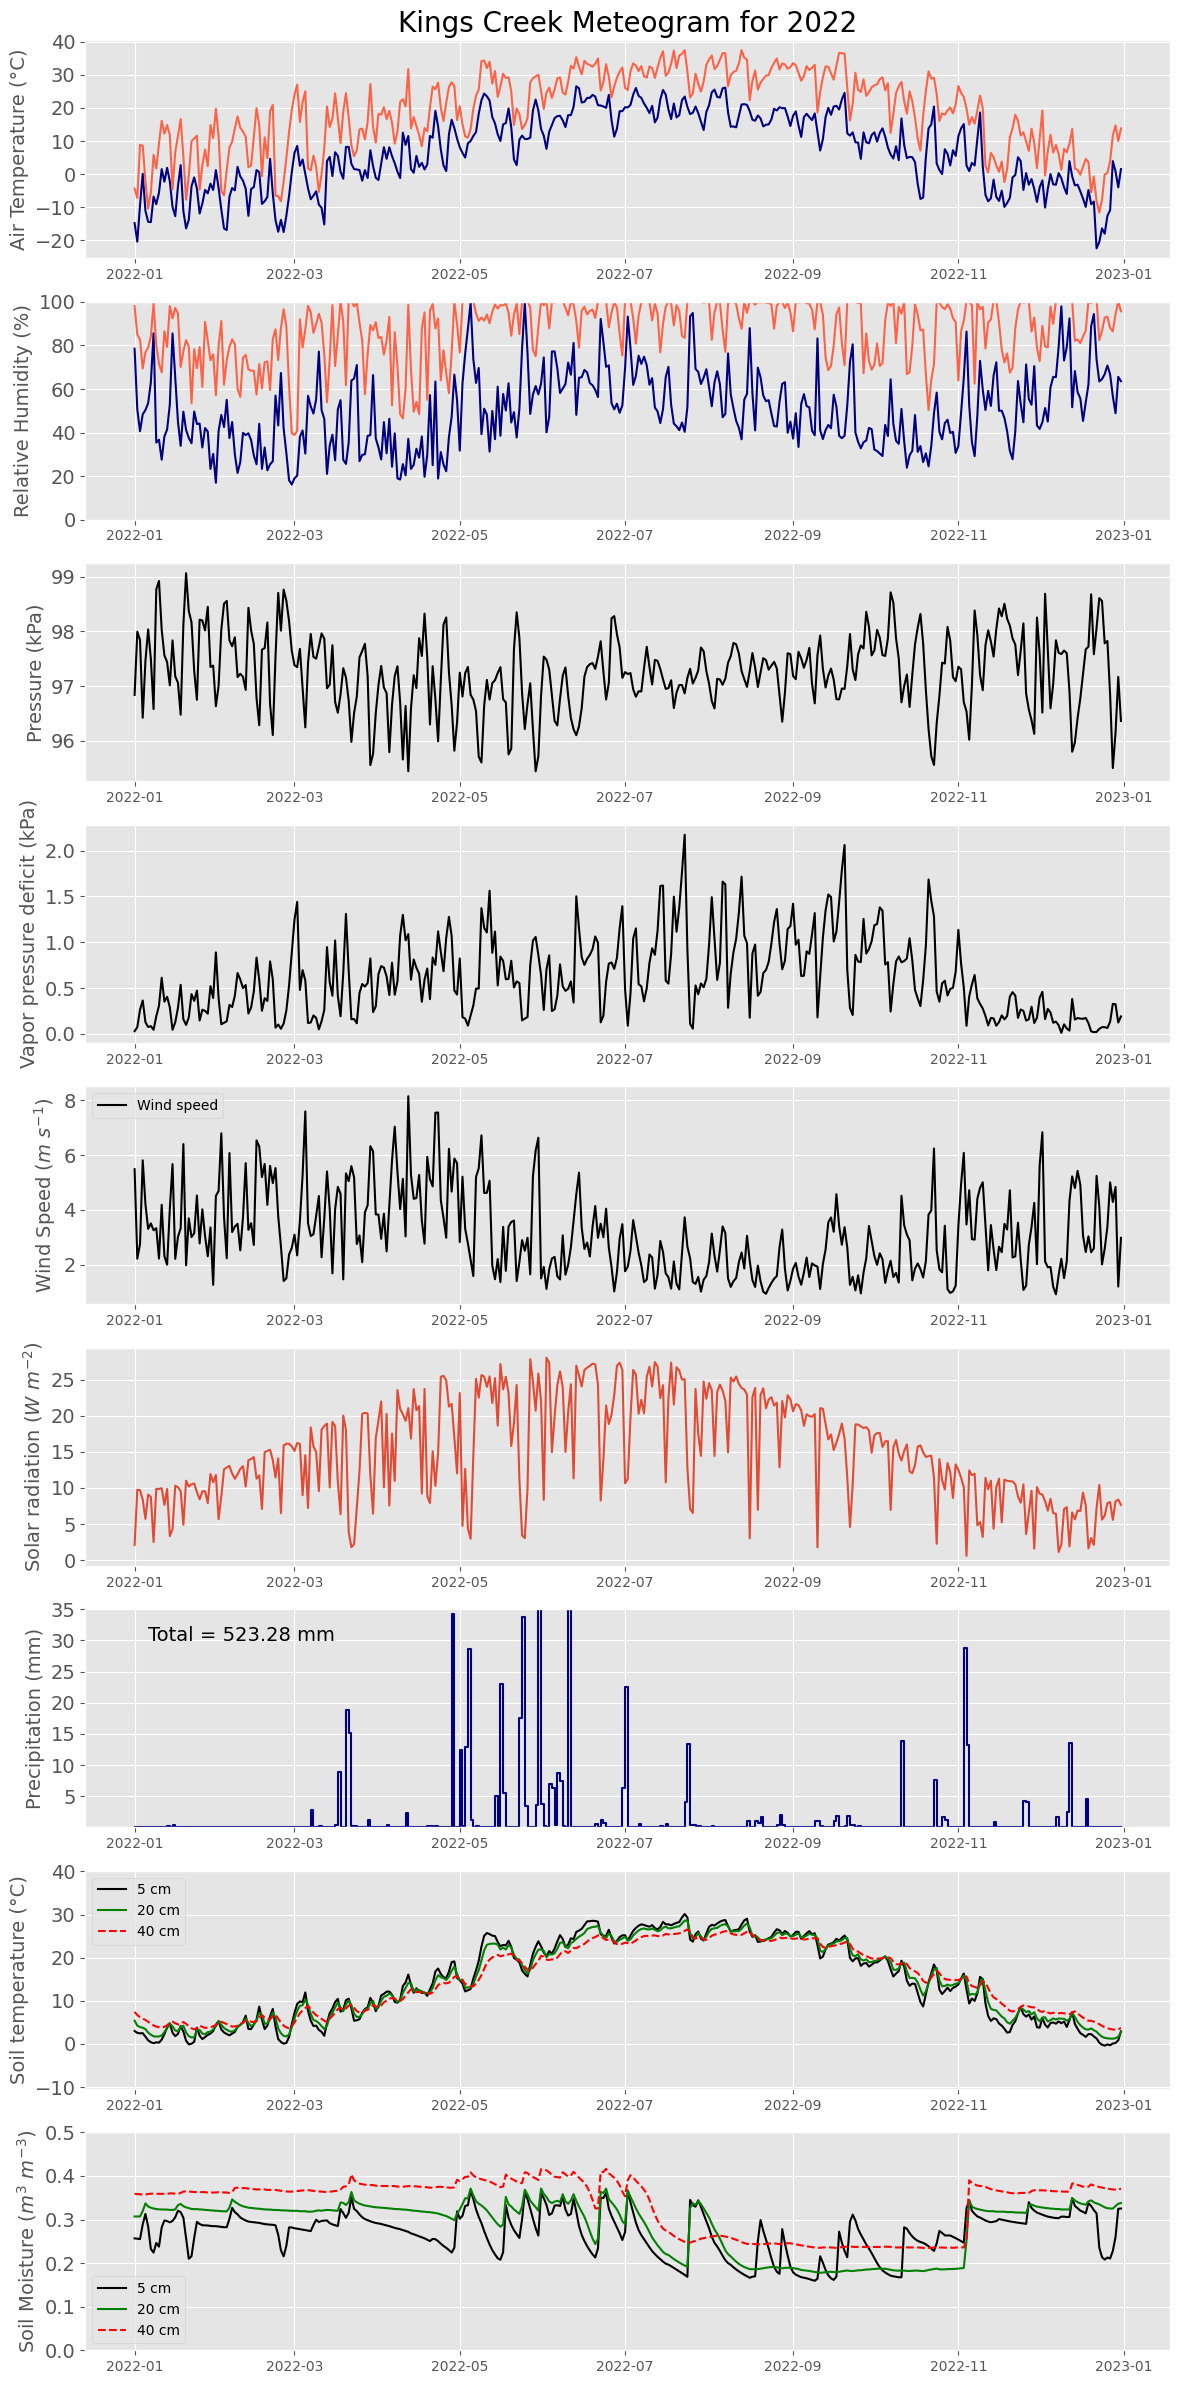

In [29]:
# Create meteogram plot

# Define style
plt.style.use('ggplot')

# Define fontsize
font = 14

# Create plot
plt.figure(figsize=(14,30))

# Air temperature
plt.subplot(9,1,1)
plt.title('Kings Creek Meteogram for 2022', size=20)
plt.plot(df['datetime'], df['tmin'], color='navy')
plt.plot(df['datetime'], df['tmax'], color='tomato')
plt.ylabel('Air Temperature (°C)', size=font)
plt.yticks(size=font)

# Relative humidity
plt.subplot(9,1,2)
plt.plot(df['datetime'], df['rmin'], color='navy')
plt.plot(df['datetime'], df['rmax'], color='tomato')
plt.ylabel('Relative Humidity (%)', size=font)
plt.yticks(size=font)
plt.ylim(0,100)

# Atmospheric pressure
plt.subplot(9,1,3)
plt.plot(df['datetime'], df['pressure'], '-k')
plt.ylabel('Pressure (kPa)', size=font)
plt.yticks(size=font)

# Vapor pressure deficit
plt.subplot(9,1,4)
plt.plot(df['datetime'], df['vpd'], '-k')
plt.ylabel('Vapor pressure deficit (kPa)', size=font)
plt.yticks(size=font)

# Wind speed
plt.subplot(9,1,5)
plt.plot(df['datetime'], df['wspd'], '-k', label='Wind speed')
plt.ylabel('Wind Speed ($m \ s^{-1}$)', size=font)
plt.legend(loc='upper left')
plt.yticks(size=font)

# Solar radiation
plt.subplot(9,1,6)
plt.plot(df['datetime'], df['srad'])
plt.ylabel('Solar radiation ($W \ m^{-2}$)', size=font)
plt.yticks(size=font)

# Precipitation
plt.subplot(9,1,7)
plt.step(df['datetime'], df['prcp'], color='navy')
plt.ylabel('Precipitation (mm)', size=font)
plt.yticks(size=font)
plt.ylim(0.01,35)
plt.text(df['datetime'].iloc[5], 30, f"Total = {P_total} mm", size=14)

# Soil temperature
plt.subplot(9,1,8)
plt.plot(df['datetime'], df['soiltemp_5cm'], '-k', label='5 cm')
plt.plot(df['datetime'], df['soiltemp_20cm'], '-g', label='20 cm')
plt.plot(df['datetime'], df['soiltemp_40cm'], '--r', label='40 cm')
plt.ylabel('Soil temperature (°C)', size=font)
plt.yticks(size=font)
plt.ylim(df['soiltemp_5cm'].min()-10, df['soiltemp_5cm'].max()+10)
plt.grid(which='minor')
plt.legend(loc='upper left')

# Soil moisture
plt.subplot(9,1,9)
plt.plot(df['datetime'], df['vwc_5cm'], '-k', label='5 cm')
plt.plot(df['datetime'], df['vwc_20cm'], '-g', label='20 cm')
plt.plot(df['datetime'], df['vwc_40cm'], '--r', label='40 cm')
plt.ylabel('Soil Moisture ($m^3 \ m^{-3}$)', size=font)
plt.yticks(size=font)
plt.ylim(0, 0.5)
plt.grid(which='minor')
plt.legend(loc='best')

plt.subplots_adjust(hspace=0.2) # for space between columns wspace=0)
#plt.savefig('meteogram.svg', format='svg')
plt.show()
